# 0. Introdução

**Trabalho**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois conjuntos de dados para trabalhar o problema de regressão. Separe cada dataset em conjunto de treinamento e conjunto de teste. Explique o seu critério de separação e o método utilizado.
- Você deverá implementar soluções para cada dataset usando:
- - regressão linear (ou regressão múltipla)
- - regressão polinomial
- - SVR (use os kernels linear, sigmoide, RBF e polinomial)
- - rede neural (MLP ou RBF).
- Descreva os parâmetros/arquiteturas de cada modelo.
- Compare os resultados (para treinamento e teste) com as medidas de desempenho SEQ, EQM, REQM, EAM e r² , e verifique qual a melhor opção dentre os métodos implementados que melhor se ajusta a seus dados.
- Você deverá fazer a visualização dos dados originais com os dados ajustados em cada experimento, tanto para o conjunto de treinamento quanto para o de teste. Os gráficos devem conter títulos nos eixos e legenda. Comente os resultados encontrados na visualização.

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
#Utils
import pandas as pd
import numpy as np
import pandas_profiling
import math

#Preprocess
from sklearn.preprocessing import StandardScaler

# Split
from sklearn.model_selection import train_test_split

# Regressores
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#Metricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Dados

O conjunto de dados possui informações quimicas de vinhos
Possui mais de 1500 registros e 12 atributos


Fonte: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## 1.1 Informações sobre os dados:

#### Atributos:
Input variables (based on physicochemical tests):

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):
- quality (score between 0 and 10)

## Importando Dataset

In [2]:
dataset = './dataset/datasets_4458_8204_winequality-red.csv'

data_raw = pd.read_csv(dataset)

In [3]:
data_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# wine_quality = []
# for quality in data_raw.quality:
#     if quality >= 6:
#         wine_quality.append(1)
#     else:
#         wine_quality.append(0)
#
# data_raw.quality = wine_quality

In [5]:
for col in data_raw:
    print(col, data_raw[col].unique())

fixed acidity [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35 

## Pré-processamento

In [6]:
# pandas_profiling.ProfileReport(data_raw)

## Visualização

In [7]:
# sns.pairplot(data_raw)

In [8]:
plt.clf()

<Figure size 432x288 with 0 Axes>

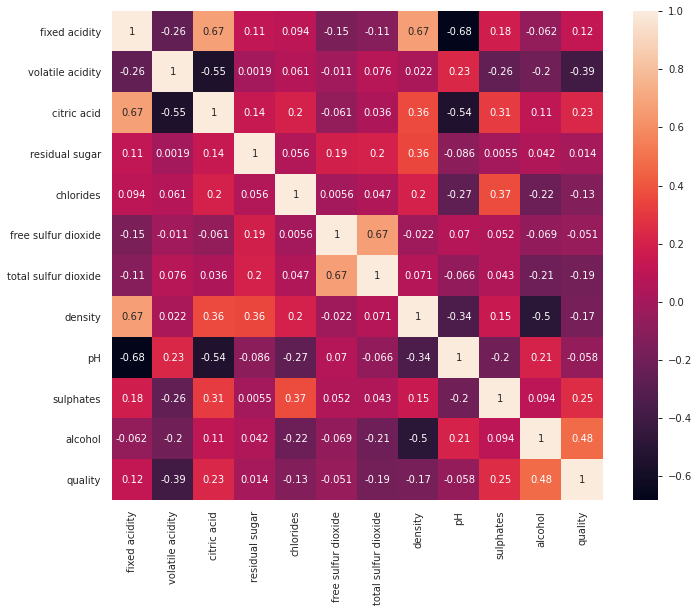

In [9]:
plt.subplots(figsize=(11, 9))
sns.heatmap(data_raw.corr(), annot=True)

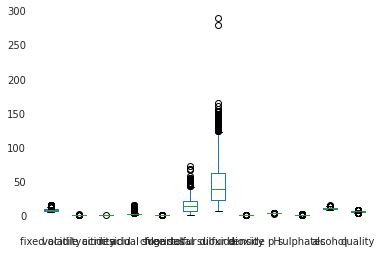

In [10]:
data_raw.plot.box()

## Escalonando

In [11]:
scaler = StandardScaler().fit(data_raw)
data_scaled = scaler.transform(data_raw)

In [12]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_raw.columns)

In [13]:
data_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


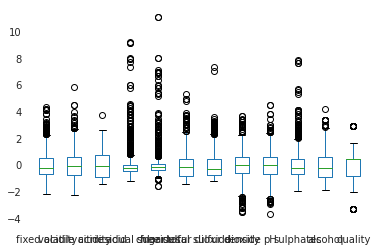

In [14]:
data_scaled_df.plot.box()

## Utilidades

In [15]:
lista_metricas_treino = []
lista_metricas_teste = []

In [16]:
def metricas(y_true, y_pred, alg):
    r2 = r2_score(y_true, y_pred)
    eqm = mean_squared_error(y_true, y_pred)
    seq = len(y_true)*eqm
    reqm = math.sqrt(eqm)

    return {'Algoritmo':alg, 'R2':r2, 'EQM':eqm, 'REQM':reqm, 'SEQ':seq}

## Separando conjuntos de Treino e Teste

Para a separação utilizou-se do train_test_split que divide o conjunto em treino e teste aleatóriamente

In [17]:
test_attr = 'fixed acidity';
output_attr = 'quality';
train, test = train_test_split(data_scaled_df, test_size = 0.2, shuffle=True)

x_train = train.drop(columns=[output_attr])
y_train = train[output_attr]

x_test = test.drop(columns=[output_attr])
y_test = test[output_attr]

## Aplicando a Regressão

### Regressão Linear

In [18]:
lire = LinearRegression()

In [19]:
lire.fit(x_train, y_train)

LinearRegression()

## Avaliação para Teste

In [20]:
y_pred = lire.predict(x_test)
linear_metricas = metricas(y_test, y_pred, 'Regressão Linear - Teste')
lista_metricas_teste.append(linear_metricas)

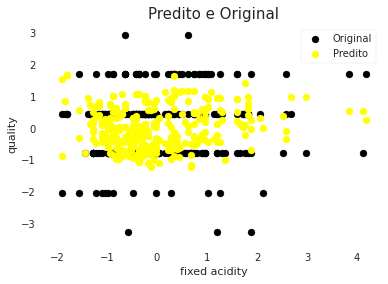

In [21]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [22]:
y_pred = lire.predict(x_train)
linear_metricas = metricas(y_train, y_pred, 'Regressão Linear - Treino')
lista_metricas_treino.append(linear_metricas)

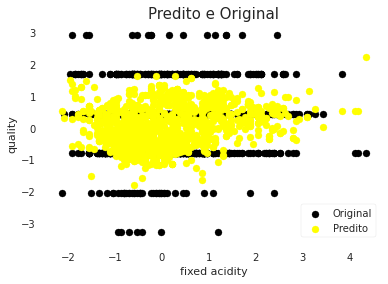

In [23]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## SVR

### Kernel RBF

In [24]:
svr_reg = SVR(kernel='rbf')

In [25]:
svr_reg.fit(x_train, y_train)

SVR()

## Avaliação para Teste

In [26]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - RBF - Teste')
lista_metricas_teste.append(svr_metricas)

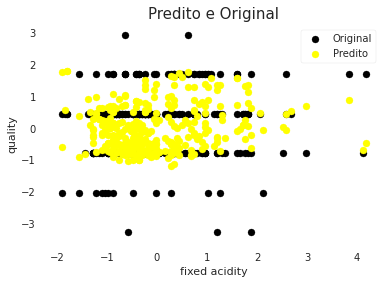

In [27]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [28]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - RBF - Treino')
lista_metricas_treino.append(svr_metricas)

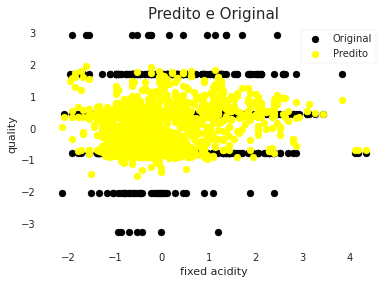

In [29]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Linear

In [30]:
svr_reg = SVR(kernel='linear')

In [31]:
svr_reg.fit(x_train, y_train)

SVR(kernel='linear')

## Avaliação para Teste

In [32]:
y_pred = svr_reg.predict(x_test)
metricas_svr = metricas(y_test, y_pred, 'SVR - Linear - Teste')
lista_metricas_teste.append(metricas_svr)

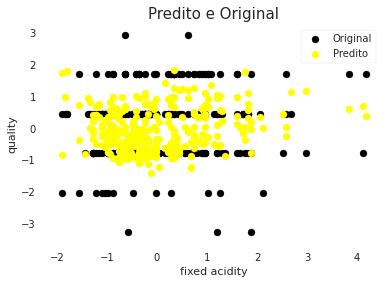

In [33]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [34]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Linear - Treino')
lista_metricas_treino.append(svr_metricas)

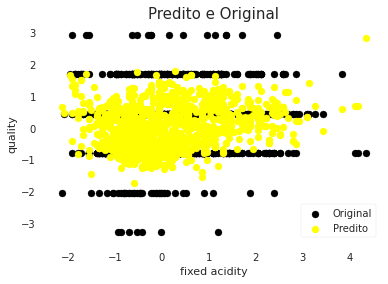

In [35]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Sigmoide

In [36]:
train, test = train_test_split(data_raw, test_size = 0.2, shuffle=True)

x_train_sig = train.drop(columns=[output_attr])
y_train_sig  = train[output_attr]

x_test_sig  = test.drop(columns=[output_attr])
y_test_sig  = test[output_attr]

In [37]:
svr_reg = SVR(kernel='sigmoid')

In [38]:
svr_reg.fit(x_train_sig , y_train_sig )

SVR(kernel='sigmoid')

## Avaliação para Teste

In [39]:
y_pred_sig  = svr_reg.predict(x_test_sig)
metricas_svr = metricas(y_test_sig , y_pred_sig , 'SVR - Sigmoide - Teste')
lista_metricas_teste.append(metricas_svr)

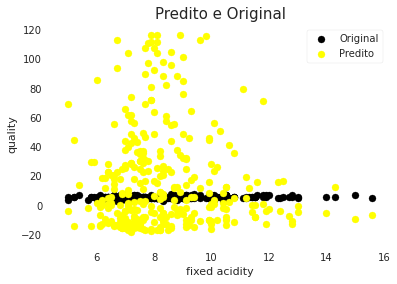

In [40]:
plt.scatter(x_test_sig [test_attr], y_test_sig ,  color='black')
plt.scatter(x_test_sig [test_attr], y_pred_sig , color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [41]:
y_pred_sig  = svr_reg.predict(x_train_sig)
svr_metricas = metricas(y_train_sig , y_pred_sig , 'SVR - Sigmoide - Treino')
lista_metricas_treino.append(svr_metricas)

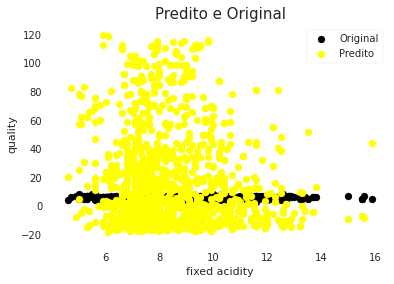

In [42]:
plt.scatter(x_train_sig [test_attr], y_train_sig ,  color='black')
plt.scatter(x_train_sig [test_attr], y_pred_sig , color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Polinomial

In [43]:
svr_reg = SVR(kernel='poly', degree=3)

In [44]:
svr_reg.fit(x_train, y_train)

SVR(kernel='poly')

## Avaliação para Teste

In [45]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - Polinomial - Teste')
lista_metricas_teste.append(svr_metricas)

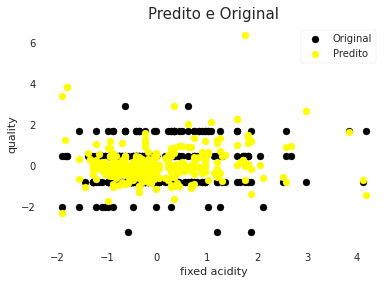

In [46]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [47]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Polinomial - Treino')
lista_metricas_treino.append(svr_metricas)

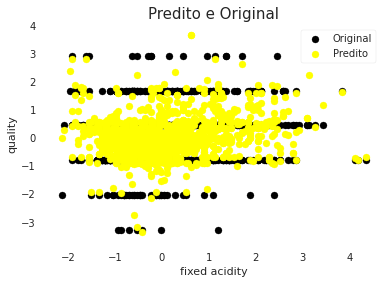

In [48]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Redes Neurais

### Kernel Linear

In [49]:
mlp_reg = MLPRegressor()

In [50]:
mlp_reg.fit(x_train, y_train)

MLPRegressor()

## Avaliação para Teste

In [51]:
y_pred = mlp_reg.predict(x_test)
mlp_metricas = metricas(y_test, y_pred, 'MLP - Teste')
lista_metricas_teste.append(mlp_metricas)

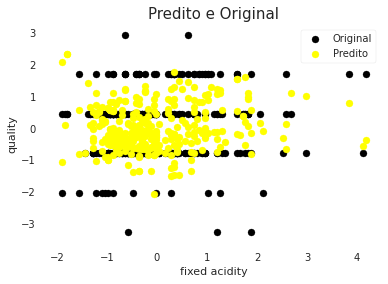

In [52]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [53]:
y_pred = mlp_reg.predict(x_train)
mlp_metricas = metricas(y_train, y_pred, 'MLP - Treino')
lista_metricas_treino.append(mlp_metricas)

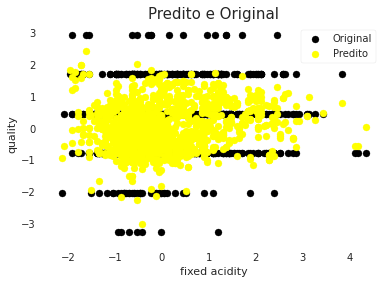

In [54]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

# Resultados

In [55]:
metricas_teste = pd.DataFrame(lista_metricas_teste)
metricas_teste

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Teste,0.322617,0.708590,0.841778,226.748957
1,SVR - RBF - Teste,0.385657,0.642646,0.801652,205.646758
2,SVR - Linear - Teste,0.303653,0.728427,0.853480,233.096752
3,SVR - Sigmoide - Teste,-1955.626553,1316.117972,36.278340,421157.751023
4,SVR - Polinomial - Teste,0.099509,0.941977,0.970555,301.432642
5,MLP - Teste,0.375016,0.653777,0.808565,209.208543


In [56]:
metricas_teste = round(metricas_teste, 3)

In [57]:
metricas_teste

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Teste,0.323,0.709,0.842,226.749
1,SVR - RBF - Teste,0.386,0.643,0.802,205.647
2,SVR - Linear - Teste,0.304,0.728,0.853,233.097
3,SVR - Sigmoide - Teste,-1955.627,1316.118,36.278,421157.751
4,SVR - Polinomial - Teste,0.100,0.942,0.971,301.433
5,MLP - Teste,0.375,0.654,0.809,209.209


In [58]:
metricas_teste.to_excel('wine_metricas_teste.xlsx')

In [59]:
metricas_treino = pd.DataFrame(lista_metricas_treino)
metricas_treino

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Treino,0.366947,0.625541,0.790911,8.000668e+02
1,SVR - RBF - Treino,0.535704,0.458786,0.677337,5.867869e+02
2,SVR - Linear - Treino,0.354539,0.637801,0.798625,8.157479e+02
3,SVR - Sigmoide - Treino,-2007.247559,1298.276549,36.031605,1.660496e+06
4,SVR - Polinomial - Treino,0.472925,0.520820,0.721679,6.661287e+02
5,MLP - Treino,0.592636,0.402530,0.634453,5.148359e+02


In [60]:
metricas_treino = round(metricas_treino, 3)

In [61]:
metricas_treino.to_excel('wine.xlsx')